In [3]:
# IMAGE PREPROCESSING FUNCTIONS FOR USE IN MODEL DEVELOPMENT, EVALUATION, AND PRODUCTION
import numpy as np
import pandas as pd
import PIL as pil
import PIL
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
from os.path import isfile, join
import tempfile
import pickle
import time
import gc
import cv2
import joblib
import math
from image_preprocessing import standardize_image_dataset,resize_dataset,binarize_dataset,crop_dataset,process_dataset_blur,do_pooling_dataset
from pipeline import model_pipeline

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.metrics import accuracy_score,f1_score
from sklearn.base import clone

In [4]:
import pickle
top_bernoulli_model = pickle.load(open('nb_model_results/top_bernoulli_model.pickle','rb'))
top_bernoulli_model_predictions = pickle.load(open('nb_model_results/top_bernoulli_model_predictions.pickle','rb'))


In [5]:
top_gaussian_model = pickle.load(open('nb_model_results/top_gaussian_model.pickle','rb'))
top_gaussian_model_predictions = pickle.load(open('nb_model_results/top_gaussian_model_predictions.pickle','rb'))


# Bernoulli

In [97]:
top_bernoulli_model_predictions['confusion_matrix']

array([[188, 458],
       [ 69, 665]], dtype=int64)

In [199]:
top_bernoulli_model

{'features':             0          1          2          3          4          5    \
 54     5.555555   5.666667   5.333333   5.444445   4.888889   4.888889   
 2602   0.000000   3.111111   5.666667   5.000000   6.777778  30.555555   
 3433   0.000000   9.666667  10.000000  10.000000  10.333333   9.333333   
 235   64.888885   1.000000   1.000000   1.000000   3.111111  22.777779   
 1806   0.000000   0.000000   2.222222   2.888889   3.333333   4.000000   
 ...         ...        ...        ...        ...        ...        ...   
 3330   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
 70     0.000000  72.555557  73.888885  39.000000  32.000000  58.111111   
 132    0.000000   3.000000   3.555556   5.555555   5.444445  26.666666   
 2014   0.000000   1.000000   1.000000   1.000000  55.555557  52.666668   
 1931  44.555557  26.000000  26.000000  26.000000  26.000000  38.888889   
 
             6          7          8          9    ...        246        247  \
 54   

In [93]:
top_bernoulli_model

{'features':             0          1          2          3          4          5    \
 54     5.555555   5.666667   5.333333   5.444445   4.888889   4.888889   
 2602   0.000000   3.111111   5.666667   5.000000   6.777778  30.555555   
 3433   0.000000   9.666667  10.000000  10.000000  10.333333   9.333333   
 235   64.888885   1.000000   1.000000   1.000000   3.111111  22.777779   
 1806   0.000000   0.000000   2.222222   2.888889   3.333333   4.000000   
 ...         ...        ...        ...        ...        ...        ...   
 3330   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
 70     0.000000  72.555557  73.888885  39.000000  32.000000  58.111111   
 132    0.000000   3.000000   3.555556   5.555555   5.444445  26.666666   
 2014   0.000000   1.000000   1.000000   1.000000  55.555557  52.666668   
 1931  44.555557  26.000000  26.000000  26.000000  26.000000  38.888889   
 
             6          7          8          9    ...        246        247  \
 54   

In [12]:
top_bernoulli_model_predictions

{'features':            0          1          2          3          4          5    \
 3949  0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
 230   0.000000  36.666668  33.000000  32.000000  48.222221  49.888889   
 354   0.000000   0.000000   0.000000   0.000000   9.000000  25.111111   
 2736  0.000000   0.000000   0.000000   0.000000   0.222222   0.333333   
 3540  0.000000   0.000000   0.000000   0.666667   9.888889  22.222221   
 ...        ...        ...        ...        ...        ...        ...   
 1776  2.000000  14.444445  31.000000   2.000000   2.444444   2.333333   
 1791  0.333333   2.000000   2.000000   1.777778   2.000000   2.000000   
 2099  0.000000   0.000000   2.666667   2.888889   3.222222   4.000000   
 53    1.000000   1.000000   1.000000   1.000000   1.000000   1.555556   
 3857  3.777778   2.444444   3.111111   4.111111   3.666667   3.333333   
 
             6          7          8          9    ...        246        247  \
 3949   0.000000  

# Gaussian Model

In [4]:
top_gaussian_model

{'features':        0    1    2    3    4    5    6    7    8    9   ...   54   55   56  \
 54      7    6    6   99  126  125   17    6   10  110  ...  127   15   10   
 2602    3    8  127  127  127  127   16    3    2  113  ...  123    3    2   
 3433   11   15   14  114  116   12   13   12   12   16  ...  126    9    9   
 235    99    1  126  125  126  125    1    1    1  127  ...  123    1  120   
 1806    0    9  125  126  126  107    6    0    0  124  ...  107    7    4   
 ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
 3330    0    0   84  124  122   81    0    0    0   84  ...  124    0    0   
 70    114  124  121  124  127  125  122   99  108  126  ...  125  104   72   
 132     4   14  115  126  122  122   13    3    6  122  ...  127    3    9   
 2014    1  127  119  103  110  124   59    1    1  126  ...  115    1    1   
 1931  109   70  126  126  122  125   70  114   70  124  ...  127   71   81   
 
        57   58   59   60   61   62   

In [113]:
top_gaussian_model_predictions

{'features':       0    1    2    3    4    5    6   7    8    9   ...   54   55   56   57  \
 3949   0    0    0    0    0    0    0   0    5  126  ...  123   78    0    0   
 230   96  110  124  127  127  125  126  98  110  127  ...  127   23  108   39   
 354    0   30  114  127  125  126   13   0    0  127  ...  121    0    0    1   
 2736   0    1    1   18   18    0    0   0    0    3  ...  117    1    0    0   
 3540   0   10  126  124  127  126   11   0    0  126  ...  127    2    8  116   
 ...   ..  ...  ...  ...  ...  ...  ...  ..  ...  ...  ...  ...  ...  ...  ...   
 1776   4   71  117  127  126  119    6   4    6  126  ...   93   26  125  126   
 1791   9    4  102  125  115  118    4   5   12  105  ...   61    8    5   74   
 2099   0    5    7   14    7    5    7   0    0   67  ...   10    0    0    4   
 53     1    1  123  127  124  122    1   1    1  127  ...  127    1    1  124   
 3857   9    9  115  127  124  125  122   8   17  113  ...  126  116   64   98   
 
  

# Pulling images for presentation

In [6]:

scan_path = "/Users/neilbhatia/GitHub/w207_final_project/Amit/Labeled Data/labeled_data.pkl"
scan_path = "D:\\GitHub\\\w207_final_project\\Amit\\Labeled Data\\labeled_data.pkl"
brain_scans = pickle.load(open(scan_path,'rb'))

brain_scans_labels = brain_scans['label']
brain_scans = brain_scans.iloc[:,:-1]
brain_scans

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel65527,pixel65528,pixel65529,pixel65530,pixel65531,pixel65532,pixel65533,pixel65534,pixel65535,pixel65536
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,6,6,6,6,6,6,6,6,6,...,7,6,8,7,7,7,7,6,6,7
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
brain_scans.loc[53]

pixel1        0
pixel2        0
pixel3        0
pixel4        0
pixel5        0
             ..
pixel65532    0
pixel65533    0
pixel65534    0
pixel65535    0
pixel65536    0
Name: 53, Length: 65536, dtype: uint8

In [40]:
brain_scans_labels

0       1
1       1
2       1
3       1
4       1
       ..
4595    0
4596    0
4597    0
4598    0
4599    0
Name: label, Length: 4600, dtype: uint8

# Choosing an original image to showcase comparisons

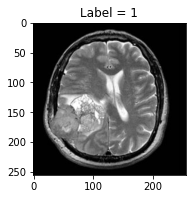

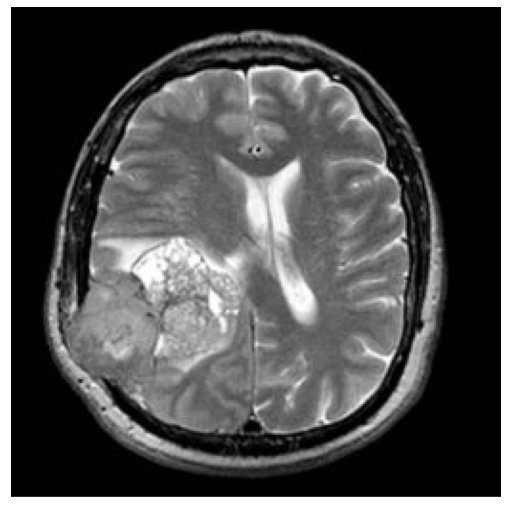

In [213]:
# image_num = 354
image_num = 53
# image_num = 230
original_image = brain_scans.loc[image_num].to_numpy().reshape(256,256)
plt.subplot(121),plt.imshow(original_image, cmap='gray'),plt.title('Label = '+ str(brain_scans_labels.loc[image_num]))

figure, axis = plt.subplots(1, 1,figsize=(20,9))
axis.imshow(original_image,cmap='gray')
axis.set_xticks([]) 
axis.set_yticks([])
figure.savefig("D:\\GitHub\\w207_final_project\\nb_model_presentation_images\\original_image")



In [89]:
top_bernoulli_model['best_preprocess']

'(Initial Standardization/Resizing)(Blurring, Type = b, Dimension = (128, 128), Kernel = (3, 3), sigma_x = 0, sigma_y = 0)(Pool, pool_size = (8, 8), pooling_function = <function amax at 0x11194eca0>)'

In [85]:
top_bernoulli_model_predictions['features']

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
3949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
230,0.000000,36.666668,33.000000,32.000000,48.222221,49.888889,68.666664,37.777779,39.222221,59.888889,...,37.333332,40.777779,72.222221,33.888889,43.333332,19.222221,18.444445,15.777778,13.888889,0.000000
354,0.000000,0.000000,0.000000,0.000000,9.000000,25.111111,60.333332,70.666664,59.222221,65.111115,...,62.888889,63.555557,47.666668,75.888885,29.777779,5.444445,0.000000,0.000000,0.000000,0.000000
2736,0.000000,0.000000,0.000000,0.000000,0.222222,0.333333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3540,0.000000,0.000000,0.000000,0.666667,9.888889,22.222221,85.555557,83.555557,76.000000,61.000000,...,74.888885,90.000000,70.888885,70.777779,48.444443,7.111111,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,2.000000,14.444445,31.000000,2.000000,2.444444,2.333333,35.777779,46.888889,50.333332,35.444443,...,36.000000,29.444445,26.222221,16.555555,19.888889,24.444445,47.666668,69.111115,102.444443,74.222221
1791,0.333333,2.000000,2.000000,1.777778,2.000000,2.000000,1.888889,14.666667,15.222222,5.333333,...,56.888889,63.444443,68.888885,56.888889,80.111115,32.000000,4.888889,3.222222,3.222222,1.111111
2099,0.000000,0.000000,2.666667,2.888889,3.222222,4.000000,5.000000,4.777778,4.777778,3.666667,...,3.000000,3.444444,3.222222,3.111111,3.555556,3.666667,4.000000,4.000000,0.000000,0.000000
53,1.000000,1.000000,1.000000,1.000000,1.000000,1.555556,30.666666,67.555557,64.555557,28.333334,...,71.111115,51.333332,68.666664,51.555557,21.222221,1.444444,1.000000,1.000000,1.000000,1.000000


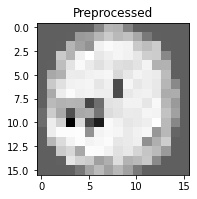

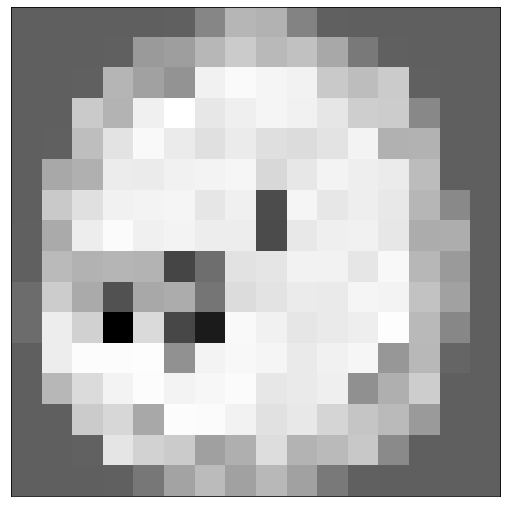

In [112]:
bernoulli_model_preprocessed_image = top_bernoulli_model_predictions['features'].loc[53].to_numpy().reshape(16, 16)
plt.subplot(121),plt.imshow(bernoulli_model_preprocessed_image, cmap='gray'),plt.title('Preprocessed')
figure, axis = plt.subplots(1, 1,figsize=(20,9))
axis.imshow(bernoulli_model_preprocessed_image,cmap='gray')
axis.set_xticks([]) 
axis.set_yticks([])
figure.savefig("D:\\GitHub\\w207_final_project\\nb_model_presentation_images\\bernoulli_final_image")



In [12]:
top_bernoulli_model_images = top_bernoulli_model_predictions['features']

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
3949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
230,0.000000,36.666668,33.000000,32.000000,48.222221,49.888889,68.666664,37.777779,39.222221,59.888889,...,37.333332,40.777779,72.222221,33.888889,43.333332,19.222221,18.444445,15.777778,13.888889,0.000000
354,0.000000,0.000000,0.000000,0.000000,9.000000,25.111111,60.333332,70.666664,59.222221,65.111115,...,62.888889,63.555557,47.666668,75.888885,29.777779,5.444445,0.000000,0.000000,0.000000,0.000000
2736,0.000000,0.000000,0.000000,0.000000,0.222222,0.333333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3540,0.000000,0.000000,0.000000,0.666667,9.888889,22.222221,85.555557,83.555557,76.000000,61.000000,...,74.888885,90.000000,70.888885,70.777779,48.444443,7.111111,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,2.000000,14.444445,31.000000,2.000000,2.444444,2.333333,35.777779,46.888889,50.333332,35.444443,...,36.000000,29.444445,26.222221,16.555555,19.888889,24.444445,47.666668,69.111115,102.444443,74.222221
1791,0.333333,2.000000,2.000000,1.777778,2.000000,2.000000,1.888889,14.666667,15.222222,5.333333,...,56.888889,63.444443,68.888885,56.888889,80.111115,32.000000,4.888889,3.222222,3.222222,1.111111
2099,0.000000,0.000000,2.666667,2.888889,3.222222,4.000000,5.000000,4.777778,4.777778,3.666667,...,3.000000,3.444444,3.222222,3.111111,3.555556,3.666667,4.000000,4.000000,0.000000,0.000000
53,1.000000,1.000000,1.000000,1.000000,1.000000,1.555556,30.666666,67.555557,64.555557,28.333334,...,71.111115,51.333332,68.666664,51.555557,21.222221,1.444444,1.000000,1.000000,1.000000,1.000000


# Gaussian Model images

In [115]:
top_gaussian_model_images = top_gaussian_model_predictions['features']
top_gaussian_model_images

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
3949,0,0,0,0,0,0,0,0,5,126,...,123,78,0,0,0,0,0,0,0,0
230,96,110,124,127,127,125,126,98,110,127,...,127,23,108,39,123,127,127,125,30,19
354,0,30,114,127,125,126,13,0,0,127,...,121,0,0,1,127,127,126,126,3,0
2736,0,1,1,18,18,0,0,0,0,3,...,117,1,0,0,0,0,1,2,1,0
3540,0,10,126,124,127,126,11,0,0,126,...,127,2,8,116,123,125,126,111,57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,4,71,117,127,126,119,6,4,6,126,...,93,26,125,126,81,67,61,58,87,121
1791,9,4,102,125,115,118,4,5,12,105,...,61,8,5,74,101,106,123,107,6,4
2099,0,5,7,14,7,5,7,0,0,67,...,10,0,0,4,6,7,8,5,5,0
53,1,1,123,127,124,122,1,1,1,127,...,127,1,1,124,127,127,127,124,29,1


(<AxesSubplot:title={'center':'Preprocessed'}>,
 Text(0.5, 1.0, 'Preprocessed'))

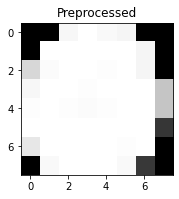

In [168]:
gaussian_model_preprocessed_image = top_gaussian_model_images.loc[53].to_numpy().reshape(8, 8)
plt.subplot(121),plt.imshow(gaussian_model_preprocessed_image, cmap='gray'),plt.title('Preprocessed')

In [48]:
# gaussian_model_preprocessed_image = top_gaussian_model_images.loc[53].to_numpy().reshape(8, 8)
# plt.subplot(121),plt.imshow(gaussian_model_preprocessed_image, cmap='gray'),plt.title('Preprocessed')
# figure, axis = plt.subplots(1, 1,figsize=(20,9))
# axis.imshow(gaussian_model_preprocessed_image,cmap='gray')
# axis.set_xticks([]) 
# axis.set_yticks([])
# figure.savefig("D:\\GitHub\\w207_final_project\\nb_model_presentation_images\\gaussian_final_image")



In [ ]:

original_img = brain_scans.iloc[192,:-1].to_numpy().reshape(150, 150)

plt.subplot(121),plt.imshow(original_img, cmap='gray'),plt.title('Original')
plt.show()

In [106]:
top_bernoulli_model_predictions

{'features':            0          1          2          3          4          5    \
 3949  0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
 230   0.000000  36.666668  33.000000  32.000000  48.222221  49.888889   
 354   0.000000   0.000000   0.000000   0.000000   9.000000  25.111111   
 2736  0.000000   0.000000   0.000000   0.000000   0.222222   0.333333   
 3540  0.000000   0.000000   0.000000   0.666667   9.888889  22.222221   
 ...        ...        ...        ...        ...        ...        ...   
 1776  2.000000  14.444445  31.000000   2.000000   2.444444   2.333333   
 1791  0.333333   2.000000   2.000000   1.777778   2.000000   2.000000   
 2099  0.000000   0.000000   2.666667   2.888889   3.222222   4.000000   
 53    1.000000   1.000000   1.000000   1.000000   1.000000   1.555556   
 3857  3.777778   2.444444   3.111111   4.111111   3.666667   3.333333   
 
             6          7          8          9    ...        246        247  \
 3949   0.000000  

In [110]:
# Confusion Matrix analysis

total_samples = top_bernoulli_model_predictions['confusion_matrix'].sum()
bernoulli_accuracy = (top_bernoulli_model_predictions['confusion_matrix'][0][0]+ top_bernoulli_model_predictions['confusion_matrix'][1][1])/total_samples
total_samples

1380

# Applying Individual Preprocessing Steps

(Initial Standardization/Resizing)(Blurring, Type = b, Dimension = (128, 128), Kernel = (3, 3), sigma_x = 0, sigma_y = 0)(Pool, pool_size = (8, 8), pooling_function = <function amax at 0x11194eca0>)


(<AxesSubplot:title={'center':'Blurred'}>,
 Text(0.5, 1.0, 'Blurred'))

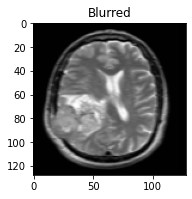

In [192]:
from image_preprocessing import process_image_blur,resize_vector_image

print(top_bernoulli_model['best_preprocess'])

image_num = 53
original_image = brain_scans.loc[image_num].to_numpy()
original_image = resize_vector_image(original_image,(256,256),(128,128))
#1. Blurring the image
blurred_original_image = process_image_blur(original_image,blur_type='b',kernel=(3,3)).reshape(128, 128)


plt.subplot(121),plt.imshow(blurred_original_image, cmap='gray'),plt.title('Blurred')


(<AxesSubplot:title={'center':'Blurred'}>,
 Text(0.5, 1.0, 'Blurred'))

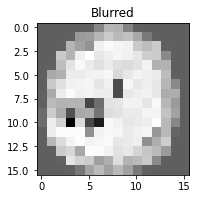

In [193]:
woah = top_bernoulli_model_predictions['features'].loc[53].to_numpy().reshape(16, 16)
plt.subplot(121),plt.imshow(woah, cmap='gray'),plt.title('Blurred')


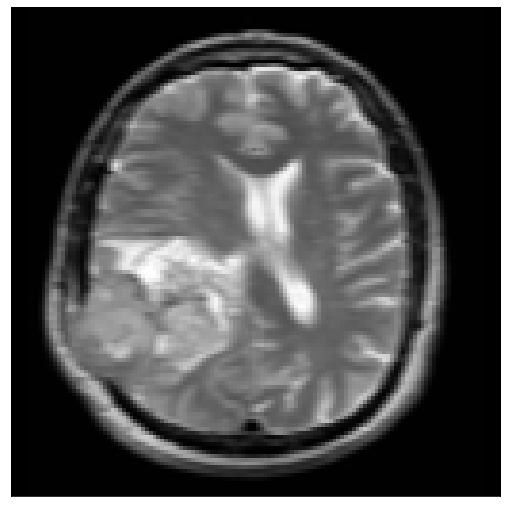

In [194]:
figure, axis = plt.subplots(1, 1,figsize=(20,9))
axis.imshow(blurred_original_image,cmap='gray')
axis.set_xticks([]) 
axis.set_yticks([])
figure.savefig("D:\\GitHub\\w207_final_project\\nb_model_presentation_images\\bernoulli_1_blur_image")


(<AxesSubplot:title={'center':'Preprocessed'}>,
 Text(0.5, 1.0, 'Preprocessed'))

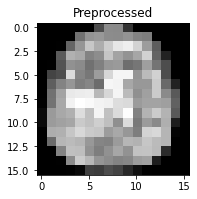

In [198]:
from image_preprocessing import do_pooling

blurred_pooled_image = do_pooling(blurred_original_image,pool_size=(8,8),pooling_function=np.max)
plt.subplot(121),plt.imshow(blurred_pooled_image, cmap='gray'),plt.title('Preprocessed')


(<AxesSubplot:title={'center':'Preprocessed'}>,
 Text(0.5, 1.0, 'Preprocessed'))

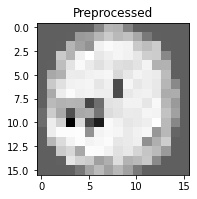

In [196]:
bernoulli_model_preprocessed_image = top_bernoulli_model_predictions['features'].loc[53].to_numpy().reshape(16, 16)
plt.subplot(121),plt.imshow(bernoulli_model_preprocessed_image, cmap='gray'),plt.title('Preprocessed')

In [207]:
pd.Series(top_gaussian_model_predictions['preds'])

0       1
1       1
2       1
3       0
4       1
       ..
1375    1
1376    1
1377    0
1378    1
1379    1
Length: 1380, dtype: int64

In [230]:
bernoulli_features_df = pd.DataFrame(top_bernoulli_model_predictions['features'])
bernoulli_features_df.loc[53]

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
252      1.0
253      1.0
254      1.0
255      1.0
preds    0.0
Name: 53, Length: 257, dtype: float64

0       1
1       1
2     123
3     127
4     124
     ... 
59    127
60    127
61    124
62     29
63      1
Name: 53, Length: 64, dtype: int8

In [246]:
pd.DataFrame(top_bernoulli_model_predictions['features']).iloc[1378]

0      1.000000
1      1.000000
2      1.000000
3      1.000000
4      1.000000
         ...   
251    1.444444
252    1.000000
253    1.000000
254    1.000000
255    1.000000
Name: 53, Length: 256, dtype: float32

In [248]:
pd.DataFrame(top_bernoulli_model_predictions['features'])

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
3949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
230,0.000000,36.666668,33.000000,32.000000,48.222221,49.888889,68.666664,37.777779,39.222221,59.888889,...,37.333332,40.777779,72.222221,33.888889,43.333332,19.222221,18.444445,15.777778,13.888889,0.000000
354,0.000000,0.000000,0.000000,0.000000,9.000000,25.111111,60.333332,70.666664,59.222221,65.111115,...,62.888889,63.555557,47.666668,75.888885,29.777779,5.444445,0.000000,0.000000,0.000000,0.000000
2736,0.000000,0.000000,0.000000,0.000000,0.222222,0.333333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3540,0.000000,0.000000,0.000000,0.666667,9.888889,22.222221,85.555557,83.555557,76.000000,61.000000,...,74.888885,90.000000,70.888885,70.777779,48.444443,7.111111,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,2.000000,14.444445,31.000000,2.000000,2.444444,2.333333,35.777779,46.888889,50.333332,35.444443,...,36.000000,29.444445,26.222221,16.555555,19.888889,24.444445,47.666668,69.111115,102.444443,74.222221
1791,0.333333,2.000000,2.000000,1.777778,2.000000,2.000000,1.888889,14.666667,15.222222,5.333333,...,56.888889,63.444443,68.888885,56.888889,80.111115,32.000000,4.888889,3.222222,3.222222,1.111111
2099,0.000000,0.000000,2.666667,2.888889,3.222222,4.000000,5.000000,4.777778,4.777778,3.666667,...,3.000000,3.444444,3.222222,3.111111,3.555556,3.666667,4.000000,4.000000,0.000000,0.000000
53,1.000000,1.000000,1.000000,1.000000,1.000000,1.555556,30.666666,67.555557,64.555557,28.333334,...,71.111115,51.333332,68.666664,51.555557,21.222221,1.444444,1.000000,1.000000,1.000000,1.000000


# Gaussian Model Checking

In [250]:
gaussian_features_df = pd.DataFrame(top_gaussian_model_predictions['features'])
gaussian_features_df.iloc[1378]

0       1
1       1
2     123
3     127
4     124
     ... 
59    127
60    127
61    124
62     29
63      1
Name: 53, Length: 64, dtype: int8

In [253]:
top_gaussian_model_predictions['preds'][1378]

1

In [1]:
image_num = 53
# image_num = 230
original_image = brain_scans.loc[image_num].to_numpy().reshape(256,256)
plt.subplot(121),plt.imshow(original_image, cmap='gray'),plt.title('Label = '+ str(brain_scans_labels.loc[image_num]))

NameError: name 'brain_scans' is not defined

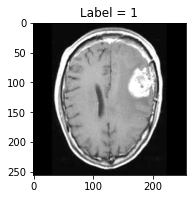

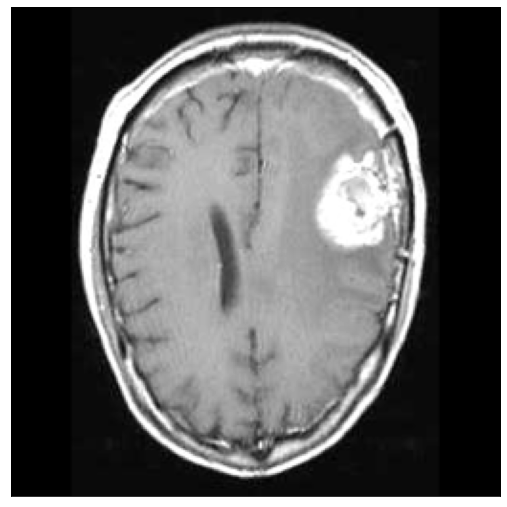

In [49]:
image_num = 89

gaussian_original_image = brain_scans.loc[image_num].to_numpy().reshape(256,256)
plt.subplot(121),plt.imshow(gaussian_original_image, cmap='gray'),plt.title('Label = '+ str(brain_scans_labels.loc[image_num]))



figure, axis = plt.subplots(1, 1,figsize=(20,9))
axis.imshow(gaussian_original_image,cmap='gray')
axis.set_xticks([]) 
axis.set_yticks([])
figure.savefig("D:\\GitHub\\w207_final_project\\nb_model_presentation_images\\gaussian_original_image")



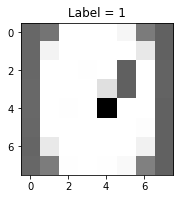

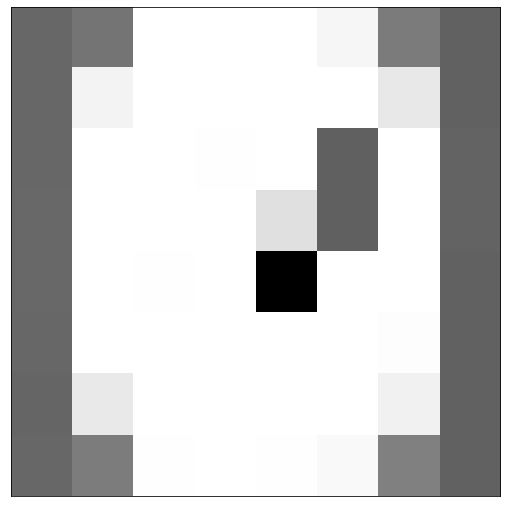

In [53]:

gaussian_image = top_gaussian_model_predictions['features'].loc[image_num].to_numpy().reshape(8,8)
plt.subplot(121),plt.imshow(gaussian_image, cmap='gray'),plt.title('Label = '+ str(brain_scans_labels.loc[image_num]))

figure, axis = plt.subplots(1, 1,figsize=(20,9))
axis.imshow(gaussian_image,cmap='gray')
axis.set_xticks([]) 
axis.set_yticks([])
figure.savefig("D:\\GitHub\\w207_final_project\\nb_model_presentation_images\\gaussian_final_image")


In [59]:
gaussian_features_df = top_gaussian_model_predictions['features']
gaussian_features_df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
3949,0,0,0,0,0,0,0,0,5,126,...,123,78,0,0,0,0,0,0,0,0
230,96,110,124,127,127,125,126,98,110,127,...,127,23,108,39,123,127,127,125,30,19
354,0,30,114,127,125,126,13,0,0,127,...,121,0,0,1,127,127,126,126,3,0
2736,0,1,1,18,18,0,0,0,0,3,...,117,1,0,0,0,0,1,2,1,0
3540,0,10,126,124,127,126,11,0,0,126,...,127,2,8,116,123,125,126,111,57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,4,71,117,127,126,119,6,4,6,126,...,93,26,125,126,81,67,61,58,87,121
1791,9,4,102,125,115,118,4,5,12,105,...,61,8,5,74,101,106,123,107,6,4
2099,0,5,7,14,7,5,7,0,0,67,...,10,0,0,4,6,7,8,5,5,0
53,1,1,123,127,124,122,1,1,1,127,...,127,1,1,124,127,127,127,124,29,1


In [66]:
# gaussian_features_df[gaussian_features_df.index == 89].iloc[-1]


# gaussian_features_df.index.get_loc(gaussian_features_df[gaussian_features_df.index == 89].iloc[-1].name)

gaussian_features_df.iloc[1308]


top_gaussian_model_predictions['preds'][1308]

#This model accurately predicted this image to be = 1


1